In [124]:
# importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [125]:
# importing csv files
course_reviews_data = pd.read_csv("2024_02_21_all_reviews", index_col=0)
df = pd.DataFrame(course_reviews_data)

In [126]:
df.head()

,course_code,status_code,star_count,prof_name,prof_slug,grade,reviewer_name,date,review_text,review_id
0,NFSC112,200,4,Abani Pradhan,/professor/pradhan,Expecting an A,Anonymous,12/23/2023,"Didn't learn anything, but didn't need to. Eas...",review-31256
1,NFSC112,200,5,Qin Wang,/professor/wang_qin,Expecting an A,Anonymous,12/18/2023,Easy class. The lectures are asynchronous but ...,review-30485
2,NFSC112,200,5,Xiaoxue Jia,/professor/jia_xiaoxue,Expecting an A,Anonymous,12/13/2023,She is amazing with ADS and helpful with answe...,review-29852
3,NFSC112,200,2,Abani Pradhan,/professor/pradhan,Expecting a B-,Anonymous,12/06/2023,Easy class as long as you actually watch the l...,review-28855
4,NFSC112,200,5,Qin Wang,/professor/wang_qin,Expecting an A,Anonymous,11/26/2023,"she is a good lecturer, nfsc 112, is ""chill,"" ...",review-28192


In [127]:
df.star_count.unique()

array([4, 5, 2, 3, 1])

In [128]:
df.grade.unique()

array(['Expecting an A', 'Expecting a B-', 'Expecting an A+',
       'Expecting a B+', 'Expecting an A-', 'Expecting a B', nan,
       'Expecting a C', 'Expecting a b', 'Expecting a C+',
       'Expecting an F', 'Expecting a D', 'Expecting a W',
       'Expecting a P', 'Expecting a a', 'Expecting a B?',
       'Expecting a c?', 'Expecting a c-', 'Expecting a C-',
       'Expecting a D+', 'Expecting a 65', 'Expecting a b+',
       'Expecting a c', 'Expecting an XF', 'Expecting a ?',
       'Expecting a D-', 'Expecting a A?', 'Expecting a AA',
       'Expecting a -A', 'Expecting a s', 'Expecting a b-',
       'Expecting a C?', 'Expecting a d', 'Expecting a I',
       'Expecting a ??', 'Expecting a a-', 'Expecting a -',
       'Expecting a 74', 'Expecting a BC', 'Expecting a CD',
       'Expecting a F+', 'Expecting a CB', 'Expecting a 85',
       'Expecting a 95', 'Expecting a AU'], dtype=object)

In [129]:
df.isnull().sum()

course_code         0
status_code         0
star_count          0
prof_name           0
prof_slug           0
grade            4135
reviewer_name       0
date                0
review_text         5
review_id           0
dtype: int64

In [130]:
df.duplicated().sum()

19

In [131]:
df.reviewer_name.value_counts()

Anonymous       22644
akl2025            27
zhangsta           25
florm              22
a778999            21
                ...  
wassupgirl          1
Anonymous515        1
sccerkid02          1
iwilder             1
BioBoy05            1
Name: reviewer_name, Length: 1690, dtype: int64

In [132]:
df.review_id.value_counts()

review-31256    2
review-27350    2
review-30485    2
review-2464     2
review-2463     2
               ..
review-29341    1
review-30428    1
review-31267    1
review-4301     1
review-31530    1
Name: review_id, Length: 26144, dtype: int64

## Data Preprocessing

In [133]:
# dropping unnecessary columns
df.drop(columns=['prof_slug'], inplace=True)
df.drop(columns=['status_code'], inplace=True)

In [134]:
df.columns

Index(['course_code', 'star_count', 'prof_name', 'grade', 'reviewer_name',
       'date', 'review_text', 'review_id'],
      dtype='object')

In [135]:
# converting the date column to datetime type
df['date'] = pd.to_datetime(df['date'])
df.dtypes

course_code              object
star_count                int64
prof_name                object
grade                    object
reviewer_name            object
date             datetime64[ns]
review_text              object
review_id                object
dtype: object

In [136]:
# dropping duplicates
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

In [137]:
# handling null values in grade column with imputation of word "None"
df["grade"] = df["grade"].fillna('None')
df["grade"].isnull().sum()

0

In [138]:
# handling null values in review_text column with imputation of words "No Review"
df["review_text"] = df["review_text"].fillna('No Review')
df["review_text"].isnull().sum()

0

In [139]:
# cleaning up grade column by standardizing letter grades
df['grade'] = df['grade'].str.replace('Expecting an? ', '', regex=True).str.strip()

grades_to_standardize = ['A', 'B', 'C', 'D', 'F']

for grade in grades_to_standardize:
    df['grade'] = df['grade'].str.replace(f'(((\+|-)?{grade}(\+|-)?)|((\+|-)?{grade.lower()}(\+|-)?))(\?)?', grade, regex=True)

df["grade"].value_counts()

A       15804
B        4630
None     4135
C        1145
D         136
W         113
P          80
F          71
?           8
XF          6
BC          3
??          2
95          1
85          1
CB          1
CD          1
AA          1
74          1
-           1
I           1
s           1
65          1
AU          1
Name: grade, dtype: int64

In [140]:
# handling individual cases
df['grade'] = df['grade'].str.replace('95', "A", regex=True)
df['grade'] = df['grade'].str.replace('AA', "A", regex=True)
df['grade'] = df['grade'].str.replace('AU', "A", regex=True)
df['grade'] = df['grade'].str.replace('85', "B", regex=True)
df['grade'] = df['grade'].str.replace('BC', "B", regex=True)
df['grade'] = df['grade'].str.replace('74', "C", regex=True)
df['grade'] = df['grade'].str.replace('CB', "C", regex=True)
df['grade'] = df['grade'].str.replace('CD', "C", regex=True)
df['grade'] = df['grade'].str.replace('65', "D", regex=True)
df['grade'] = df['grade'].str.replace('XF', "F", regex=True)
df['grade'] = df['grade'].str.replace('W', "F", regex=True)
df['grade'] = df['grade'].str.replace('I', "None", regex=True)
df['grade'] = df['grade'].str.replace('s', "None", regex=True)
df['grade'] = df['grade'].str.replace('-', "None", regex=True)
df['grade'] = df['grade'].str.replace('\?+', "None", regex=True)
df["grade"].value_counts()

A       15807
B        4634
None     4148
C        1148
F         190
D         137
P          80
Name: grade, dtype: int64

<AxesSubplot:>

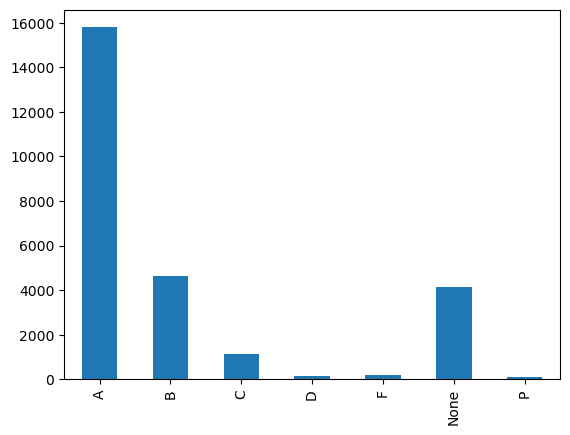

In [141]:
df["grade"].value_counts().sort_index().plot(kind="bar")

In [142]:
# formatting course codes
df['course_code'].value_counts()

ENGL101     424
MATH141     387
COMM107     386
BSCI160     378
MATH140     334
           ... 
HIST419B      1
CMSC773       1
AMST418N      1
AAST498M      1
HIST226       1
Name: course_code, Length: 2815, dtype: int64

In [143]:
df['department'] = df['course_code'].str.slice(0, 4)
df['course_number'] = df['course_code'].str.slice(4)

df[['department', 'course_number']]

,department,course_number
0,NFSC,112
1,NFSC,112
2,NFSC,112
3,NFSC,112
4,NFSC,112
...,...,...
26158,HNUH,288W
26159,HNUH,288W
26160,HNUH,288W
26161,PHSC,450


In [144]:
df = df.drop("course_code", axis=1)
df

,star_count,prof_name,grade,reviewer_name,date,review_text,review_id,department,course_number
0,4,Abani Pradhan,A,Anonymous,2023-12-23,"Didn't learn anything, but didn't need to. Eas...",review-31256,NFSC,112
1,5,Qin Wang,A,Anonymous,2023-12-18,Easy class. The lectures are asynchronous but ...,review-30485,NFSC,112
2,5,Xiaoxue Jia,A,Anonymous,2023-12-13,She is amazing with ADS and helpful with answe...,review-29852,NFSC,112
3,2,Abani Pradhan,B,Anonymous,2023-12-06,Easy class as long as you actually watch the l...,review-28855,NFSC,112
4,5,Qin Wang,A,Anonymous,2023-11-26,"she is a good lecturer, nfsc 112, is ""chill,"" ...",review-28192,NFSC,112
...,...,...,...,...,...,...,...,...,...
26158,5,Kerry Tripp,A,Anonymous,2024-02-01,Professor Tripp's class was super engaging and...,review-32199,HNUH,288W
26159,5,Kerry Tripp,A,Anonymous,2023-12-22,Undoubtedly the standout among all clusters at...,review-31130,HNUH,288W
26160,5,Kerry Tripp,A,Anonymous,2023-11-01,Definitely suggest taking a class with Profess...,review-27811,HNUH,288W
26161,5,Kendall Bustad,A,Anonymous,2023-12-17,Phsc450 is honestly not a hard class! A lot of...,review-30424,PHSC,450


## Data Visualization

## Hypothesis Testing

#### Test 1

Does reviewing on plannetterp as an anonymous user encourage worse reviews/lower number of stars? Assume the significance level is 0.05.

    - H0: The average star count is the same for anonymous and non-anonymous reviewers.
    - Ha: The average star count is not the same for anonymous and non-anonymous reviewers.

In [145]:
import scipy.stats as stats

anonymous_scores = df[df['reviewer_name'] == 'Anonymous']['star_count']
non_anonymous_scores = df[df['reviewer_name'] != 'Anonymous']['star_count']

t_stat, p_value = stats.ttest_ind(anonymous_scores, non_anonymous_scores)

print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -10.718341887139474
p-value: 9.488975795507464e-27


We reject the null hypothesis because the p-value of 9.49e-27 is less than the significance 0.05. We can conclude that there is a difference between the means of the two groups.

The negative ttest that indicates that the anonymous_scores has a lower mean than the non_anonymous scores, indicating that the average star count is higher for non_anonymous_scores.

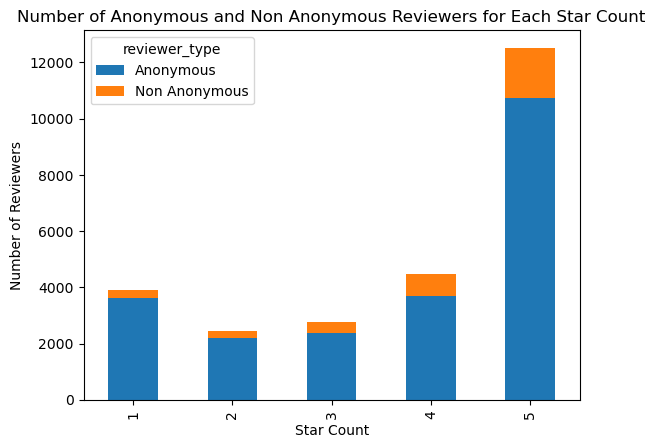

In [146]:
df['reviewer_type'] = df['reviewer_name'].apply(lambda x: 'Anonymous' if x == 'Anonymous' else 'Non Anonymous')
df.groupby(['star_count', 'reviewer_type']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Number of Anonymous and Non Anonymous Reviewers for Each Star Count')
plt.xlabel('Star Count')
plt.ylabel('Number of Reviewers')
plt.show()

#### Test 2

Are people with better grade more inclined to give a professor more stars?

    - H0: 
    - Ha: 